### Sentimental Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('movie[1].csv')

In [3]:
df.shape

(40000, 2)

In [4]:
df = df.iloc[:10000] # I am just working on the 1000rows because 40k rows takes more time during training

In [5]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
9995,This is one of the most cerebral insightful mo...,1
9996,"First off, this movie is not near complete, my...",0
9997,What can be said about a movie about a cross d...,0
9998,"If you like adult comedy cartoons, like South ...",1


In [6]:
df['label'].value_counts()

label
0    5043
1    4957
Name: count, dtype: int64

<Axes: xlabel='label'>

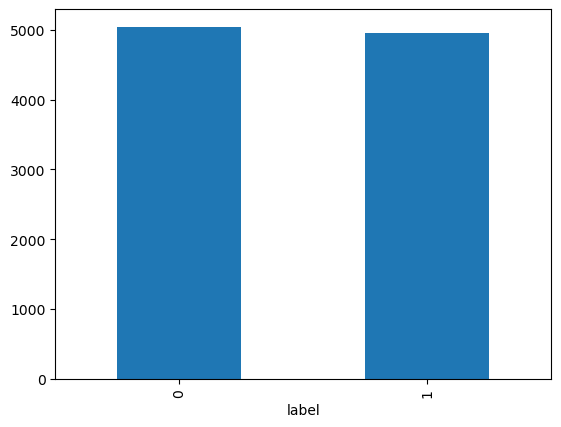

In [7]:
df['label'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

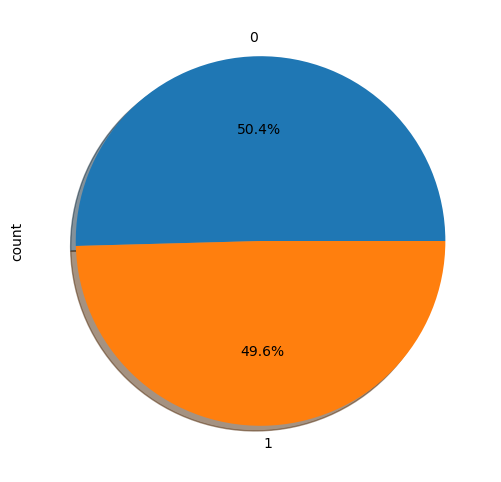

In [8]:
plt.figure(figsize=(10,6))
colors = ['green','orange']

df['label'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True)

### Text Preprocessing

In [9]:
df['text'][999]

'...but I regret having seen it. Since the ratings on IMDb are relatively high (and they must also have been relatively high on Netflix), I guess I put it in my queue because it is advertised as a gentle comedy from the UK, a category that has produced many films I liked immensely. "Saving Grace," on the other hand, falls into the category of laugh-less comedies usually populated by Hollywood movies produced and directed by the talentless. Brenda Blethyn is a capable actress, and I have liked her in other movies. The concept -- a gardener growing marijuana to overcome the penury she finds herself confronting after her husband\'s death -- does not offend me. Notwithstanding the strenuous efforts on the part of the cast to produce humor, the film falls flat on its face (falling flat on its arse might have been funnier) as far as I and my wife were concerned. Be forewarned, oh gentle reader, not all offbeat British comedies succeed. This one is a dud.'

### Cleaning Steps

1. Removing HTML tags
2. Extracting emojis (# the pattern re.compile('(?::) is a regular expression used to match and extract emojis from a given text
3. Removing Special Characters,punctuation and symbols
4. Lower Casting
5. Remove Stopwords
6. Tokenization

In [10]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [11]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>','',text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]',' ',text.lower()) + ' '.join(emojis).replace('-','')
    
    porter = PorterStemmer()
    text = [porter.stem(word) for word in text.split() if word not in stopwords_set]
    
    return " ".join(text)

In [12]:
preprocessing('This is my tags <h1> :) <p>Hello world<p> <div> <div> </h2>')

'tag hello world :)'

In [13]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [14]:
df['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 10000, dtype: object

### Visualizing Negative and Positive words

In [15]:
positivedata = df[df['label']==1]
positivedata = positivedata['text']
negdata = df[df['label']==0]
negdaata = negdata['text']

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)

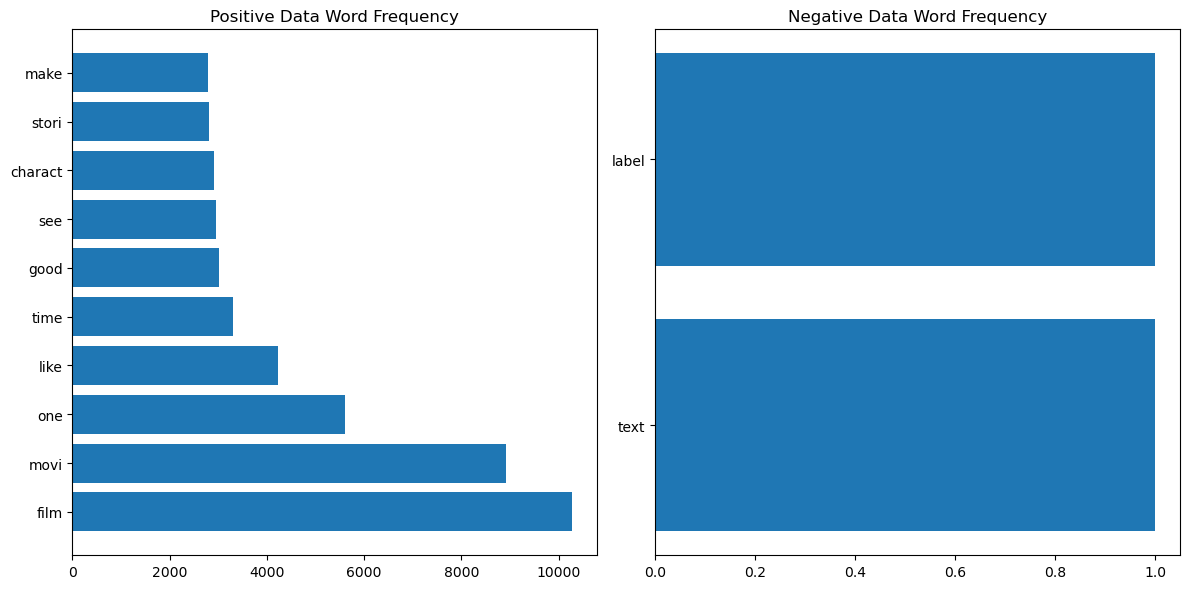

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words])
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words])
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


## TFIDF 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)

In [20]:
y = df.label.values  # Extracting labels from DataFrame
x = tfidf.fit_transform(df.text)  # Transforming text data using TF-IDF vectorizer


### Applying Machine Learning Model

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=1,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)
y_pred=clf.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   18.5s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   27.5s finished


### Accuracy

In [23]:
from sklearn import metrics

In [24]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8835


### pickle files

In [27]:
import pickle

pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

### prediction

In [34]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment] # wrap the preprocessed comment 
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

In [35]:
df['text'][10]

'believ peopl look plot film laural hardi lighten alreadi two riot comic geniu funni today 70 year ago filthi word either mouth abl keep audienc stitch comedi sophist stretch whoope cushion make grin reason watch stuff guy simpler time peopl laugh stuff funni without plot guess take simpl mind enjoy stuff qualifi two man comedi team comput sophist fortun'

In [36]:
prediction = prediction('believ peopl look plot film laural hardi lighten alreadi two riot comic geniu funni today 70 year ago filthi word either mouth abl keep audienc stitch comedi sophist stretch whoope cushion make grin reason watch stuff guy simpler time peopl laugh stuff funni without plot guess take simpl mind enjoy stuff qualifi two man comedi team comput sophist fortun')

In [38]:
prediction

1

In [37]:
if prediction == 1:
    print("Positive Comment")
else:
    print("Negative Comment")

Positive Comment
